#
IMPORT STATEMENTS

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#
DATA READING AND ANALYSIS

In [2]:
data = pd.read_csv("dataset/Admission_Predict.csv")

In [3]:
data.drop(["Serial No."], axis=1, inplace=True)

In [4]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [7]:
data.isnull().sum() 

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

#
VISUALIZATION

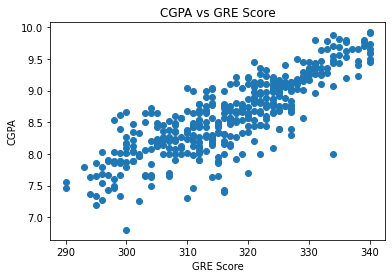

In [8]:
plt.scatter(data['GRE Score'],data['CGPA'])
plt.title('CGPA vs GRE Score')
plt.xlabel('GRE Score')
plt.ylabel('CGPA')
plt.show()

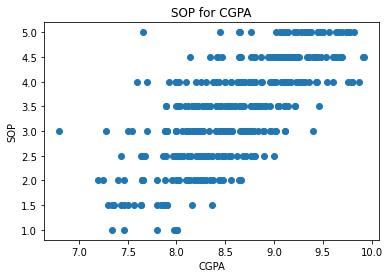

In [9]:
plt.scatter(data['CGPA'],data['SOP'])
plt.title('SOP for CGPA')
plt.xlabel('CGPA')
plt.ylabel('SOP')
plt.show()

C:\Users\ARPD\AppData\Roaming\Python\Python310\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


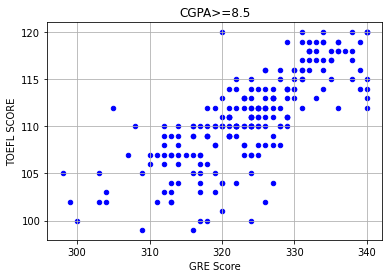

In [10]:
data[data.CGPA >= 8.5].plot(kind='scatter', x='GRE Score', y='TOEFL Score',color="BLUE")

plt.xlabel("GRE Score")
plt.ylabel("TOEFL SCORE")
plt.title("CGPA>=8.5")
plt.grid(True)

plt.show()

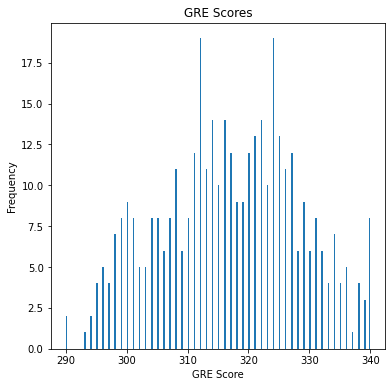

In [11]:
data["GRE Score"].plot(kind = 'hist',bins = 200,figsize = (6,6))

plt.title("GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("Frequency")

plt.show()

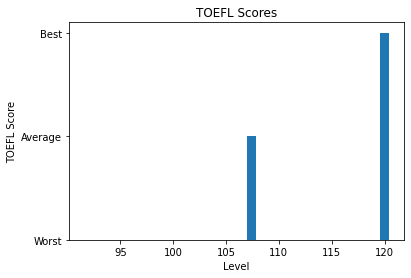

In [12]:
p = np.array([data["TOEFL Score"].min(),data["TOEFL Score"].mean(),data["TOEFL Score"].max()])
r = ["Worst","Average","Best"]
plt.bar(p,r)

plt.title("TOEFL Scores")
plt.xlabel("Level")
plt.ylabel("TOEFL Score")

plt.show()

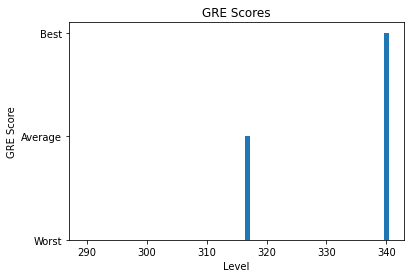

In [13]:
g = np.array([data["GRE Score"].min(),data["GRE Score"].mean(),data["GRE Score"].max()])
h = ["Worst","Average","Best"]
plt.bar(g,h)

plt.title("GRE Scores")
plt.xlabel("Level")
plt.ylabel("GRE Score")

plt.show()

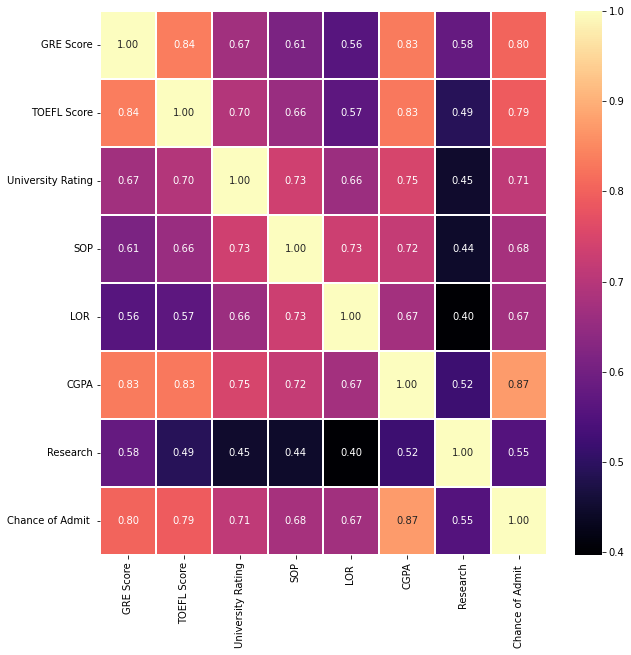

In [14]:
plt.figure(figsize=(10, 10))

sns.heatmap(data.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")

plt.show()

<AxesSubplot: xlabel='University Rating', ylabel='count'>

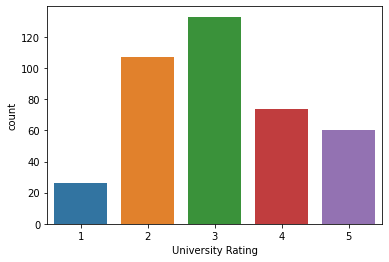

In [15]:
data.Research.value_counts()

sns.countplot(x="University Rating",data=data)

<AxesSubplot: xlabel='University Rating', ylabel='Chance of Admit '>

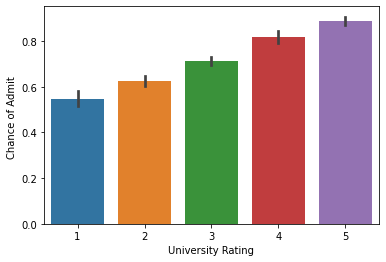

In [16]:
sns.barplot(x="University Rating", y="Chance of Admit ", data=data)

#
TRAIN-TEST SPLIT

In [17]:
X=data.drop(['Chance of Admit '],axis=1) #input data_set
y=data['Chance of Admit '] #output labels

In [18]:
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit_learn-1.1.3-cp310-cp310-win_amd64.whl (7.5 MB)
  Using cached scipy-1.9.3-cp310-cp310-win_amd64.whl (40.1 MB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
     -------------------------------------- 298.0/298.0 kB 3.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [19]:
%pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [20]:


from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

#
MODELING AND TRAINING

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])
X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
261,0.44,0.428571,0.50,0.625,0.714286,0.414791,0.0
0,0.94,0.928571,0.75,0.875,0.857143,0.916399,1.0
59,0.42,0.428571,0.25,0.250,0.142857,0.482315,0.0
241,0.54,0.392857,0.25,0.375,0.142857,0.434084,0.0
16,0.54,0.535714,0.50,0.750,0.428571,0.610932,0.0


In [22]:
from sklearn.ensemble import GradientBoostingRegressor
rgr = GradientBoostingRegressor()
rgr.fit(X_train,y_train)

GradientBoostingRegressor()

In [23]:
rgr.score(X_test,y_test)

0.8072075742821067

In [24]:
y_predict=rgr.predict(X_test)

In [25]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import numpy as np
print('Mean Absolute Error:', mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 0.042321626100529953
Mean Squared Error: 0.0036989315458589777
Root Mean Squared Error: 0.06081884202990861


In [26]:
y_train = (y_train>0.5)
y_test = (y_test>0.5)

In [27]:
from sklearn.linear_model._logistic import LogisticRegression

lore = LogisticRegression(random_state=0, max_iter=1000)

lr = lore.fit(X_train, y_train)

In [28]:
y_pred = lr.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix

print('Accuracy Score:', accuracy_score(y_test, y_pred))  
print('Recall Score:', recall_score(y_test, y_pred))  
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))
print('Confussion Matrix:\n', confusion_matrix(y_test, y_pred))


Accuracy Score: 0.9666666666666667
Recall Score: 1.0
ROC AUC Score: 0.6666666666666667
Confussion Matrix:
 [[ 1  2]
 [ 0 57]]


#
SAVING THE MODELS

In [30]:
import pickle

In [31]:
pickle.dump(lr, open("university.pkl", "wb")) #logistic regression model
pickle.dump(rgr, open("university_percent.pkl", "wb")) #regression model

#
HOSTING THE MODEL

In [32]:
import pickle


In [33]:
lr = pickle.load(open("university.pkl", "rb")) #logistic regression model
gd = pickle.load(open("university_percent.pkl", "rb")) #regression model

In [35]:
%pip install ibm_watson_machine_learning

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 1.8/1.8 MB 6.8 MB/s eta 0:00:00
     ---------------------------------------- 55.6/55.6 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 956.8/956.8 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 135.7/135.7 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached jmespath-0.10.0-py2.py3-none-any.whl (24 kB)
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.12.0-py3-none-any.whl size=73910 sha256=e48988517027ac22a9341ce9e3c1c5af0285d390e5c35b9e8d4109e088f65f03
  Stored in directory: c:\users\arpd\appdata\local\pip\cache\wheels\53\89\f8\

In [36]:
from ibm_watson_machine_learning import APIClient

In [37]:
uml_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey": "gw5Ze7Xq96hN77lD36iPpvO0jUfCZvjD8z6Zu0Aw7NnH"
}

client = APIClient(uml_credentials)

In [38]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    idr = []
    for i in space['resources']:
        idr.append(i['metadata']['id'])
    return idr    
    

In [39]:
space_uid = guid_from_space_name(client, "IBMprojectmodels")
print(space_uid[0])

4a49e5cb-0f8c-45a8-9846-41987931e257


In [40]:
client.set.default_space(space_uid[0])

'SUCCESS'

In [41]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [44]:
software_uid = client.software_specifications.get_uid_by_name('default_py3.7')
print(software_uid)
meta_props={
     client.repository.ModelMetaNames.NAME: "LogisticRegression",
     client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_uid,
     client.repository.ModelMetaNames.TYPE: "scikit-learn_0.23"
}

e4429883-c883-42b6-87a8-f419d64088cd


In [45]:
model_details = client.repository.store_model(model=lr, meta_props=meta_props, training_data=None)

Publishing model failed.
Reason: Invalid type for ml_artifact: LogisticRegression


WMLClientError: Publishing model failed.
Reason: Invalid type for ml_artifact: LogisticRegression